# Image Classification using CNN

### Loading the required packages and libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

2022-12-05 14:08:37.664697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 14:08:38.349632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-05 14:08:38.349690: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 14:08:41.315715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

### Loading the dataset from cifar10 datasets

In [2]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [3]:
len(X_train)

50000

                 We have 50000 images for train

In [4]:
len(X_test)

10000

               We have 10000 images for train

In [5]:
X_train[0].shape

(32, 32, 3)

      Each sample is a 32*32 pixel images with 3 RGB channels.

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

        The image is represented in 3D array numbers

#### Let's see the image with the help of matplotlib library

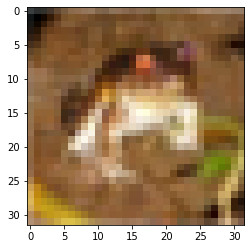

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_train[:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

#### Lets's reshape the y_train and y_test value since we don't need 2D array.

In [10]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [11]:
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [12]:

y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

#### Create a list called classes to store the output(10)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#### Function for plotting the images

In [14]:
def plot_sample(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

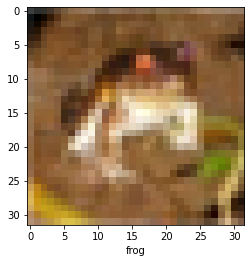

In [15]:
plot_sample(X_train,y_train,0)

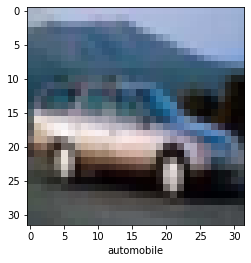

In [16]:
plot_sample(X_train,y_train,4)

In [17]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#### Scaling the X_train and X_test for better performance

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Let's build a neural network with CNN and Dense layers

In [20]:
CNN = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

2022-12-05 14:08:58.006467: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-05 14:08:58.006534: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-05 14:08:58.006609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mulehakim): /proc/driver/nvidia/version does not exist
2022-12-05 14:08:58.007334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
CNN.compile(optimizer="Adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

In [22]:
CNN.fit(X_train,y_train,epochs=15)

2022-12-05 14:09:21.679155: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/15
1563/1563 [==============================] - 36s 22ms/step - loss: 1.4963 - accuracy: 0.4624
Epoch 2/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.1522 - accuracy: 0.5935
Epoch 3/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0261 - accuracy: 0.6447
Epoch 4/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9548 - accuracy: 0.6688
Epoch 5/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8907 - accuracy: 0.6908
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8459 - accuracy: 0.7092
Epoch 7/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7993 - accuracy: 0.7232
Epoch 8/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7686 - accuracy: 0.7320
Epoch 9/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7341 - accuracy: 0.7457
Epoch 10/15
1563/1563 [==============================] - 17s 11m

In [23]:
CNN.evaluate(X_test,y_test)

2022-12-05 14:14:17.747376: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 4s 9ms/step - loss: 0.9875 - accuracy: 0.6849


[0.9874759912490845, 0.6848999857902527]

         68% accuracy which is better compared to ANN
        We'll expect some error because of 68% accuracy

### Prediction

In [25]:
y_pred = CNN.predict(X_test)
y_pred[:4]

 24/313 [=>............................] - ETA: 1s

2022-12-05 14:14:49.211558: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step


array([[2.8614558e-03, 3.4394889e-05, 1.1200515e-03, 8.0845308e-01,
        9.0107741e-03, 1.6949892e-01, 1.7497110e-03, 2.2376635e-05,
        7.2360495e-03, 1.3217345e-05],
       [2.2986068e-03, 1.4780216e-01, 7.2699709e-07, 3.0279980e-07,
        5.0568065e-09, 3.6786679e-10, 1.3513674e-09, 1.2945429e-09,
        8.4755886e-01, 2.3393971e-03],
       [8.2923755e-02, 1.7004117e-01, 8.6787634e-04, 2.9324437e-03,
        2.0781958e-03, 4.2862197e-05, 2.7513757e-05, 9.3025534e-04,
        5.2488077e-01, 2.1527509e-01],
       [7.7678019e-01, 3.1944471e-03, 1.0158837e-02, 7.0256123e-05,
        1.2167613e-03, 5.1020658e-07, 5.2801624e-07, 5.4326729e-06,
        2.0854682e-01, 2.6333360e-05]], dtype=float32)

In [26]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 3, 7, 9, 8, 5, 3, 8, 6]

In [27]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

#### Function for Prediction

In [28]:
def Prediction(X,y,ind):
    plt.imshow(X[ind])
    plt.xlabel(classes[y[ind]])
    print('Predicted:',classes[y_classes[ind]])
    if y_classes[ind]==y_test[ind]:
        return "Correct Prediction"
    else:
        return "Incorrect Prediction"

Predicted: airplane


'Correct Prediction'

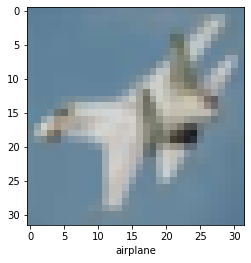

In [29]:
Prediction(X_test,y_test,10)

Predicted: automobile


'Correct Prediction'

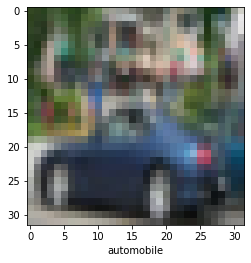

In [30]:
Prediction(X_test,y_test,122)

Predicted: airplane


'Correct Prediction'

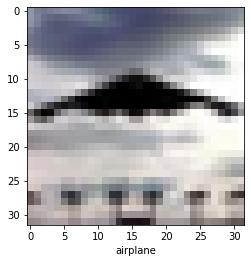

In [31]:
Prediction(X_test,y_test,111)

Predicted: truck


'Correct Prediction'

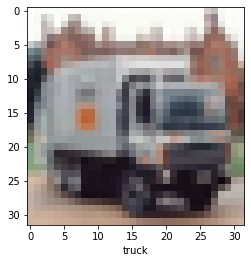

In [32]:
Prediction(X_test,y_test,11)

Predicted: deer


'Correct Prediction'

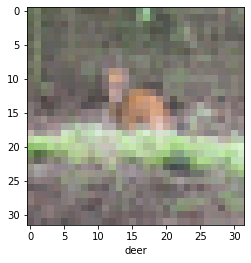

In [33]:
Prediction(X_test,y_test,32)

Predicted: automobile


'Correct Prediction'

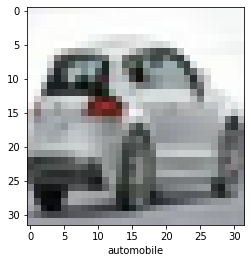

In [34]:
Prediction(X_test,y_test,131)

Predicted: horse


'Correct Prediction'

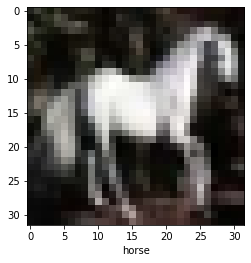

In [35]:
Prediction(X_test,y_test,13)

Predicted: truck


'Correct Prediction'

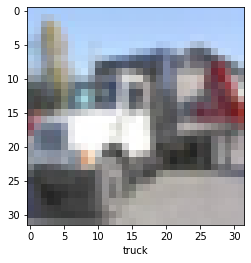

In [36]:
Prediction(X_test,y_test,45)

Predicted: airplane


'Correct Prediction'

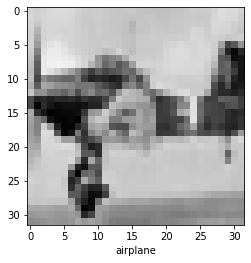

In [37]:
Prediction(X_test,y_test,153)

Predicted: truck


'Incorrect Prediction'

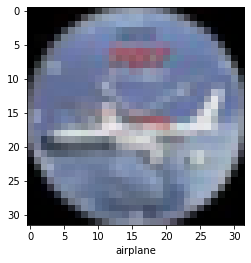

In [38]:
Prediction(X_test,y_test,888)

In this case the CNN predicts incorrectly. It was an "airplane", not "truck". We know that this is because of 68% accuracy.

### Classification Report using y_test and y_classes

Let's display our model's precisio, recall, f1-score and support for a better understanding of the overall performance of our trained model 

In [39]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.79      0.71      1000
           1       0.80      0.82      0.81      1000
           2       0.64      0.50      0.57      1000
           3       0.52      0.48      0.50      1000
           4       0.58      0.68      0.62      1000
           5       0.64      0.56      0.60      1000
           6       0.82      0.70      0.76      1000
           7       0.71      0.75      0.73      1000
           8       0.77      0.81      0.79      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

